In [71]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [72]:
# Create dataframes
ratings = pd.read_csv('ratings.dat', sep='::', engine='python', header=None, names=['UserID', 'MovieID', 'Rating', 'Timestamp'])
users = pd.read_csv('users.dat', sep='::', engine='python', header=None, names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'])
movies = pd.read_csv('movies.dat', sep='::', engine='python', header=None, names=['MovieID', 'Title', 'Genres'])


In [73]:
# Merge dataframes using MovieID nad UserIS as the primary keys
temp_data = pd.merge(ratings, users, on='UserID')
Master_Data = pd.merge(temp_data, movies, on='MovieID')

In [74]:
# Display the Master_Data dataframe
Master_Data.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [75]:
# **Explore the datasets using visual representations**

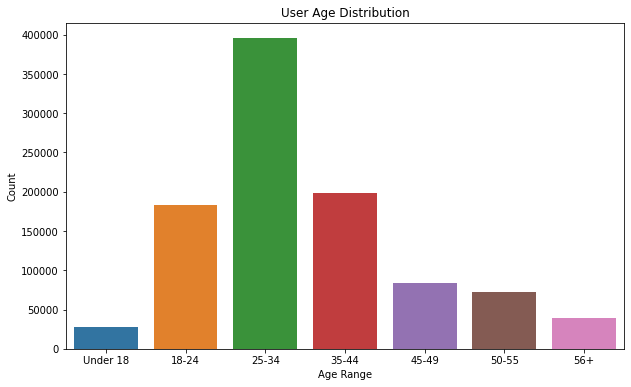

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def age_range(age):
    if age < 18:
        return "Under 18"
    elif age <= 24:
        return "18-24"
    elif age <= 34:
        return "25-34"
    elif age <= 44:
        return "35-44"
    elif age <= 49:
        return "45-49"
    elif age <= 55:
        return "50-55"
    else:
        return "56+"

# Update the 'Age' column with age ranges
Master_Data['AgeRange'] = Master_Data['Age'].apply(age_range)

# Create a countplot of age ranges using seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=Master_Data, x='AgeRange', order=["Under 18", "18-24", "25-34", "35-44", "45-49", "50-55", "56+"])
plt.title('User Age Distribution')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.show()

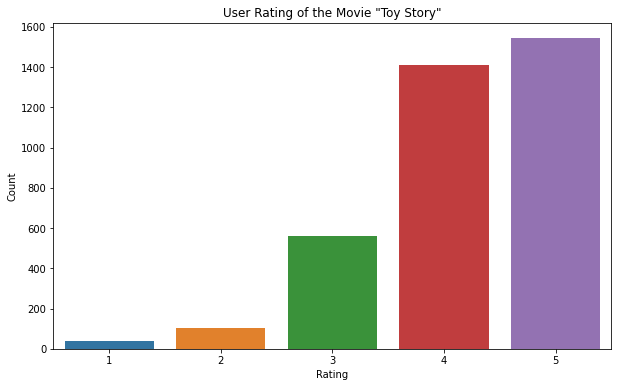

In [77]:
# User rating of the movie "Toy Story"
toy_story_ratings = Master_Data[Master_Data['Title'].str.contains('Toy Story')]['Rating']
plt.figure(figsize=(10, 6))
sns.countplot(x=toy_story_ratings)
plt.title('User Rating of the Movie "Toy Story"')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [78]:
toy_story_ratings

41626    5
41627    4
41628    4
41629    5
41630    5
        ..
56826    5
56827    4
56828    4
56829    4
56830    4
Name: Rating, Length: 3662, dtype: int64

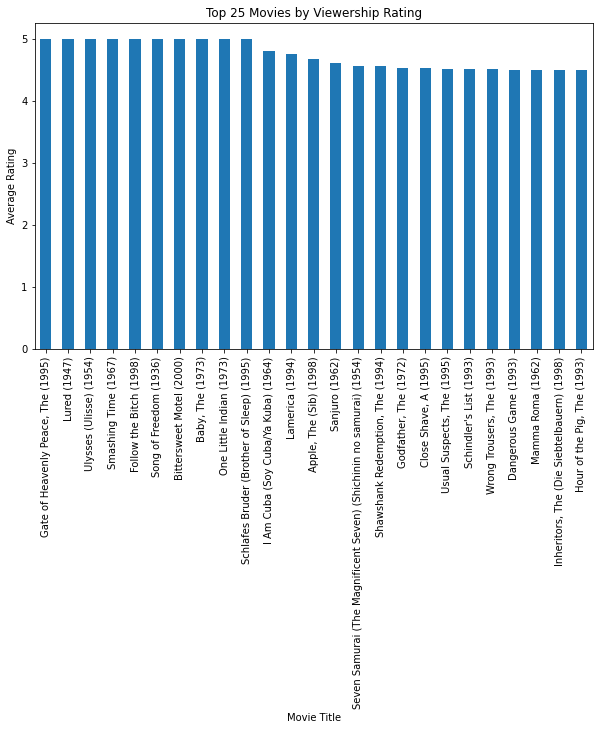

In [79]:
# Top 25 movies by viewership rating
top_movies = Master_Data.groupby('Title')['Rating'].mean().sort_values(ascending=False).head(25)
plt.figure(figsize=(10, 6))
top_movies.plot(kind='bar')
plt.title('Top 25 Movies by Viewership Rating')
plt.xlabel('Movie Title')
plt.ylabel('Average Rating')
plt.show()

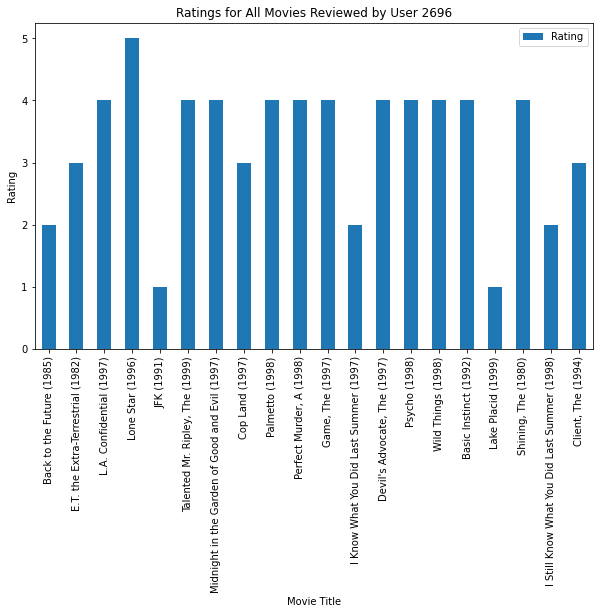

In [80]:
# Ratings for all the movies reviewed by user 2696
user_2696_ratings = Master_Data[Master_Data['UserID'] == 2696][['Title', 'Rating']]
user_2696_ratings.plot(x='Title', y='Rating', kind='bar', figsize=(10, 6))
plt.title('Ratings for All Movies Reviewed by User 2696')
plt.xlabel('Movie Title')
plt.ylabel('Rating')
plt.show()

In [81]:
# Find unique genres
unique_genres = set('|'.join(movies['Genres']).split('|'))

In [82]:
unique_genres

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [83]:
# Perform One-hot encoding for each genre type and concatanate it with major dataframe
genre_dummies = movies['Genres'].str.get_dummies(sep='|')
movies_with_genres = pd.concat([movies, genre_dummies], axis=1)


In [84]:
movies_with_genres

,MovieID,Title,Genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3879,3949,Requiem for a Dream (2000),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3880,3950,Tigerland (2000),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3881,3951,Two Family House (2000),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
# Determine the features affecting the ratings of any particular movie
# Merge Master_Data with movies_with_genres
Master_Data_with_genres = pd.merge(Master_Data, movies_with_genres, on='MovieID', suffixes=('', '_y')).drop(columns=['Title_y', 'Genres_y'])


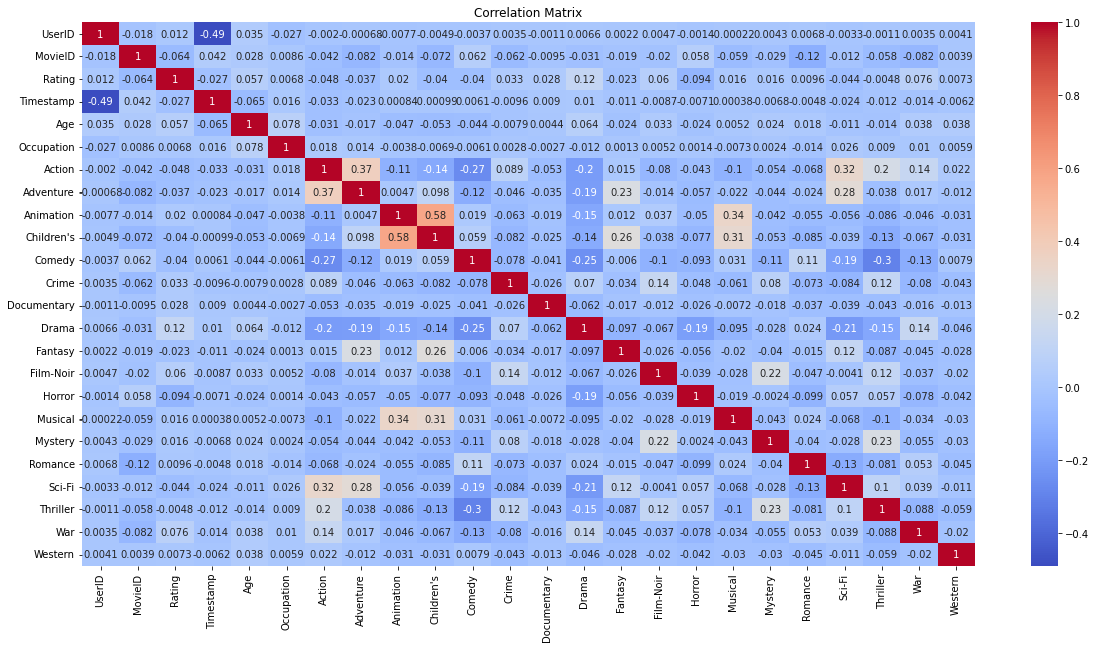

In [86]:
# Perform correlation analysis
correlation_matrix = Master_Data_with_genres.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [87]:
# Prepare input features X
X = Master_Data_with_genres.drop(['Rating', 'Title', 'Genres', 'AgeRange'], axis=1)
X

,UserID,MovieID,Timestamp,Gender,Age,Occupation,Zip-code,Action,Adventure,Animation,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1193,978300760,F,1,10,48067,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1193,978298413,M,56,16,70072,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12,1193,978220179,M,25,12,32793,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,1193,978199279,M,25,7,22903,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,1193,978158471,M,50,1,95350,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,958846401,M,18,17,47901,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000205,5675,2703,976029116,M,35,14,30030,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000206,5780,2845,958153068,M,18,17,92886,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000207,5851,3607,957756608,F,18,20,55410,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [88]:
# zip-code has many different possible values, so it overload kernel. It needs be performed different way than above function "get_dummies"
from sklearn.preprocessing import LabelEncoder
X = pd.get_dummies(X, columns=['Gender'])
le = LabelEncoder()
X['Zip-code'] = le.fit_transform(X['Zip-code'])
X

,UserID,MovieID,Timestamp,Age,Occupation,Zip-code,Action,Adventure,Animation,Children's,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Gender_F,Gender_M
0,1,1193,978300760,1,10,1588,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,1193,978298413,56,16,2248,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,12,1193,978220179,25,12,1165,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,15,1193,978199279,25,7,904,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,17,1193,978158471,50,1,3187,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,958846401,18,17,1578,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1000205,5675,2703,976029116,35,14,1060,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1000206,5780,2845,958153068,18,17,2998,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1000207,5851,3607,957756608,18,20,1905,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [89]:
#Prepare target variable
y = Master_Data['Rating']
y

0          5
1          5
2          4
3          4
4          5
          ..
1000204    5
1000205    3
1000206    1
1000207    5
1000208    4
Name: Rating, Length: 1000209, dtype: int64

In [90]:
# Take a random sample of 30% of dataset rows
sample_data = Master_Data.sample(frac=0.3, random_state=42)

# Split the sample_data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
# Normalize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [92]:
# Train different machine learning models and see which one output best results
# Linear Regression
linear_reg = LinearRegression(n_jobs=-1)
linear_reg.fit(X_train, y_train)
y_pred_lr = linear_reg.predict(X_test)

# Evaluate model performance
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression: MSE =", mse_lr, ", R2 =", r2_lr)

Linear Regression: MSE = 1.2003393625652379 , R2 = 0.03983856763854632


In [93]:
# Decision Tree
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print("Decision Tree: MSE =", mse_dt, ", R2 =", r2_dt)

Decision Tree: MSE = 1.8615940652462983 , R2 = -0.4891045648478607


In [94]:
# Random Forest
random_forest = RandomForestRegressor(n_estimators=10, random_state=42, n_jobs=-1)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest: MSE =", mse_rf, ", R2 =", r2_rf)

Random Forest: MSE = 1.0621769928315052 , R2 = 0.15035579548192102
